In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# View all of the classes that automap found
measurement = Base.classes.measurement()
station = Base.classes.station()

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [10]:
station_cols = inspector.get_columns('station')
for column in station_cols:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
measurement_cols = inspector.get_columns('measurement')
for column in measurement_cols:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.

In [13]:
query1 = "Select * from measurement order by date desc limit 10;"
df1 = pd.read_sql(query1, engine)
df1.head()

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
3,19550,USC00516128,2017-08-23,0.45,76.0
4,2723,USC00519397,2017-08-22,0.00,82.0


In [14]:
query2 = "Select * from station limit 10;"
df2 = pd.read_sql(query2, engine)
df2.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [15]:
 df1["date"] = pd.to_datetime(df1["date"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       10 non-null     int64         
 1   station  10 non-null     object        
 2   date     10 non-null     datetime64[ns]
 3   prcp     9 non-null      float64       
 4   tobs     10 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 528.0+ bytes


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
query = 'Select max(date) from measurement;'
engine.execute(query).fetchall()

[('2017-08-23',)]

In [17]:
# Calculate the date one year from the last date in data set.
'2016-08-23'

'2016-08-23'

In [18]:
# Perform a query to retrieve the data and precipitation scores
query = '''SELECT
            date, avg(prcp) as prcp
        FROM
            measurement
        WHERE
            date >= "2016-08-23"
            and prcp is not null
        GROUP BY 
            date
        ORDER BY
            date asc;
        '''
df = pd.read_sql(query, engine)
df.head()


,date,prcp
0,2016-08-23,0.451667
1,2016-08-24,1.555000
2,2016-08-25,0.077143
3,2016-08-26,0.016667
4,2016-08-27,0.064000


In [19]:
# query = """SELECT
#                 date,
#                 avg(prcp) as prcp
#             FROM
#                 measurement
#             WHERE
#                 date >= '2016-08-23'
#                 and prcp is not null
#             GROUP BY
#                 date
#             order by
#                 date asc;
#         """
# df = pd.read_sql(query, engine)
# df["date"] = pd.to_datetime(df["date"])
# df.head(10)

In [20]:
df.describe()

,prcp
count,366.000000
mean,0.170757
std,0.295683
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column


In [24]:
#Old plot. It works but its ugly. Don't lose it. 
# from matplotlib import figure, style

# plt.rcParams["figure.figsize"] = (14,6)

# plt.plot(df['date'], df.prcp, color='firebrick')

# plt.xticks(rotation=45)
# plt.show()

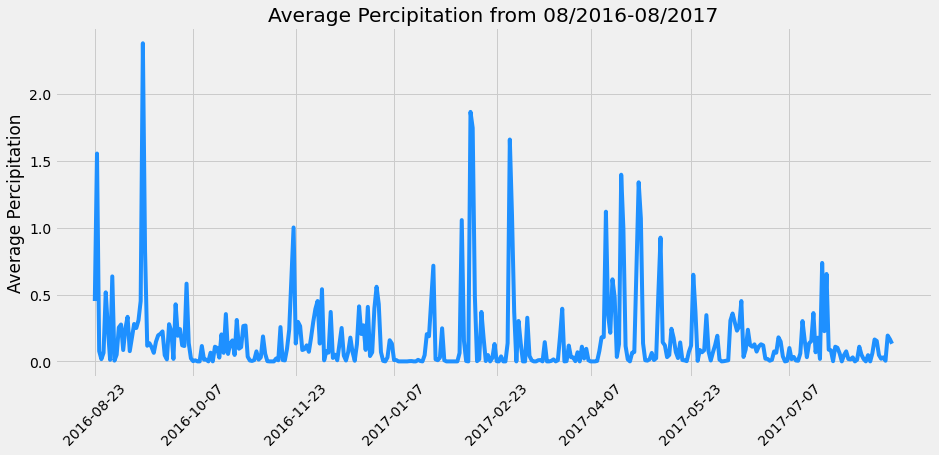

In [25]:
from matplotlib import figure, style
from matplotlib import ticker
plt.rcParams["figure.figsize"] = (14,6)

plt.plot(df['date'], df.prcp, color='dodgerblue')
plt.xticks(['2016-08-23', '2016-10-07', '2016-11-23', '2017-01-07', '2017-07-07', '2017-02-23', '2017-04-07', '2017-05-23'])
plt.xticks(rotation=45)
plt.ylabel(ylabel='Average Percipitation')
plt.title(label='Average Percipitation from 08/2016-08/2017')
plt.show()

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number stations in the dataset
query = 'select count(*) from station'
engine.execute(query).fetchall()

[(9,)]

In [28]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [33]:
query = """
select s.station, count(m.id) as obs
from measurement m
join station s on m.station = s.station
group by s.station
order by obs desc;
"""
df = pd.read_sql(query, engine)
df.head()

,station,obs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = """
select min(tobs) as tobs_min, max(tobs) as tobs_max, avg(tobs) as tobs_avg
from measurement
where station = 'USC00519281'
"""
df = pd.read_sql(query, engine)
df

,tobs_min,tobs_max,tobs_avg
0,54.0,85.0,71.663781


In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [52]:
query = """
select date, tobs
from measurement
where date >= '2016-08-23' and tobs is not null
and station = 'USC00519281'
order by date asc;
"""
df = pd.read_sql(query, engine)

df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


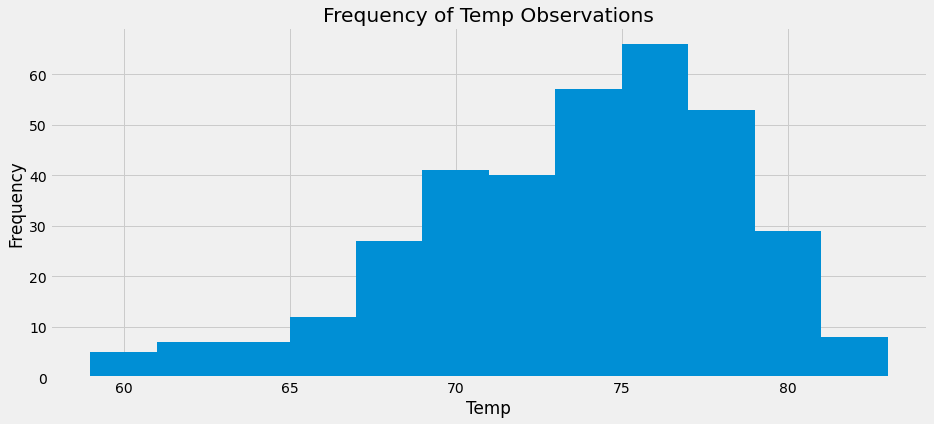

In [53]:
plt.hist(df.tobs, bins=12)
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.title('Frequency of Temp Observations')
plt.show()

# Close session

In [54]:
# Close Session
session.close()